# Script contains:
## import libraries
## import data
## Creating Customer Profiles
## Distribution of customer profiles
## Descriptive stats of customer profiles
## customer profile insights by region
## customer profile insights by price range of product
## customer profile insights by spending habit

# Ordering habits by family status
# Ordering habits by region

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
path = r'C:\Users\Bradley Allen\Desktop\Instacart Basket Analysis'

In [3]:
final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_final3.pkl'))

In [13]:
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,...,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status,customer_profile,price_range
0,2539329,1,1,2,8,NaN,True,196,1,Soda,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Mid range product
1,2539329,1,1,2,8,NaN,True,12427,3,Original Beef Jerky,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product
2,2398795,1,2,3,7,15.0,False,10258,2,Pistachios,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product
3,473747,1,3,3,12,21.0,False,12427,2,Original Beef Jerky,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product
4,473747,1,3,3,12,21.0,False,10258,3,Pistachios,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product


In [14]:
final_df.shape

(6164429, 33)

# Creating Customer Profiles

In [4]:
# Higher earner (40-59 parents income 400000+)
final_df.loc[(final_df['age_range'].isin(['40-49', '50-59'])) & (final_df['income'] >= 400000) & (final_df['department_id'].isin([1, 4, 7, 19, 16])) & (final_df['parental_status'] == 'Parent'), 'customer_profile'] = 'Higher earner'

In [5]:
# young single adult (<39, non parent, <=199999 income)
final_df.loc[(final_df['age'] <= 39) & (final_df['income'] <= 199999) & (final_df['department_id'].isin([1, 4, 7, 19])) & (final_df['parental_status'] == 'Non-parent'), 'customer_profile'] = 'Young single adult'

In [6]:
# Young parent
final_df.loc[(final_df['age_range'].isin(['20-29', '30-39'])) & (final_df['income'] <= 199999) & (final_df['department_id'].isin([4, 13, 16, 17, 18])) & (final_df['parental_status'] == 'Parent'), 'customer_profile'] = 'Young parent'

In [7]:
# Over 60 group
final_df.loc[(final_df['age'] >= 60) & (final_df['income'] <= 199999) & (final_df['department_id'].isin([1, 4, 11, 12, 15, 20])) & (final_df['parental_status'] == 'Parent'), 'customer_profile'] = 'Over 60'

In [23]:
final_df['customer_profile'].value_counts(dropna = False)

Other                 2651938
Over 60               1549040
Young parent          1435008
Young single adult     525242
Higher earner            3201
Name: customer_profile, dtype: int64

In [8]:
pd.options.display.max_rows = None

In [9]:
pd.options.display.max_columns = None

In [28]:
final_df[['user_id', 'customer_profile']].head(60)

,user_id,customer_profile
0,1,Young parent
1,1,Young parent
2,1,Young parent
3,1,Young parent
4,1,Young parent
5,1,Young parent
6,1,Young parent
7,1,Young parent
8,1,Young parent
9,1,Young parent


In [29]:
final_df.shape

(6164429, 33)

In [10]:
final_df['customer_profile'].value_counts(dropna = False)

Other                 2651938
Over 60               1549040
Young parent          1435008
Young single adult     525242
Higher earner            3201
Name: customer_profile, dtype: int64

## Checking unique values at customer level-- how many customers in each profile type

In [31]:
unique_profiles = final_df.groupby('customer_profile')['user_id'].nunique().sort_values(ascending = False)

In [32]:
unique_profiles

customer_profile
Other                 69112
Over 60               38544
Young parent          35427
Young single adult    13344
Higher earner            65
Name: user_id, dtype: int64

# Distribution of Customer Profile Types #

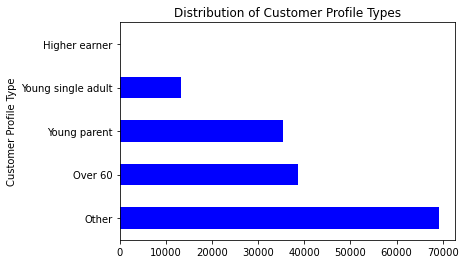

In [35]:
# Bar Chart of customer profile type distribution
profile_bar = unique_profiles.plot.barh(color = ['blue'], xlabel= 'Customer Profile Type', ylabel= 'No. of Customers', title = 'Distribution of Customer Profile Types')

In [36]:
# exporting bar chart as png
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profiles_distribution.png'))

# Descriptive Stats of Customer Profiles # 

In [37]:
order_freq_stats = final_df.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [38]:
order_freq_stats

days_since_prior_order           
                                     mean  min   max
customer_profile                                    
Higher earner                   10.290755  0.0  30.0
Other                           10.797796  0.0  30.0
Over 60                         10.777456  0.0  30.0
Young parent                    10.737003  0.0  30.0
Young single adult              10.854068  0.0  30.0

In [39]:
order_freq_stats.to_clipboard()

In [40]:
prices_stats = final_df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [41]:
prices_stats

prices           
                        mean  min   max
customer_profile                       
Higher earner       7.786254  1.0  25.0
Other               7.795092  1.0  25.0
Over 60             7.804677  1.0  25.0
Young parent        7.780429  1.0  25.0
Young single adult  7.775769  1.0  25.0

In [42]:
prices_stats.to_clipboard()

# Creating customer profile insights by region #

In [43]:
xtab_profile_region = pd.crosstab(final_df['customer_profile'], final_df['region'], dropna = False)

In [44]:
xtab_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Higher earner,1138,165,748,1084
Other,630084,468150,872051,629049
Over 60,357799,274373,517075,365287
Young parent,336369,251543,483508,337349
Young single adult,121307,92368,179346,122219


In [45]:
xtab_profile_region.to_clipboard()

# Customer Profile by Price Range Insights #

In [46]:
xtab_profile_range = pd.crosstab(final_df['customer_profile'], final_df['price_range'], dropna = False)

In [47]:
xtab_profile_range

price_range,High range product,Low range product,Mid range product
customer_profile,,,
Higher earner,43,1015,2143
Other,33925,828301,1789712
Over 60,20222,481845,1046973
Young parent,17863,449478,967667
Young single adult,6296,164355,354591


In [48]:
xtab_profile_range.to_clipboard()

# Customer profile & Spending habit insights #

In [49]:
xtab_profile_spender = pd.crosstab(final_df['customer_profile'], final_df['spending_habit'], dropna = False)

In [50]:
xtab_profile_spender

spending_habit,Higher spender,Lower spender
customer_profile,,
Higher earner,0,3201
Other,37247,2614691
Over 60,20096,1528944
Young parent,17873,1417135
Young single adult,6253,518989


In [51]:
xtab_profile_spender.to_clipboard()

# Ordering habits by family status

In [12]:
xtab_ordering_fam_status = pd.crosstab(final_df['fam_status'], final_df['loyalty_flag'], dropna = False)

In [13]:
xtab_ordering_fam_status

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,174465,80569,271735
living with parents and siblings,97977,44316,153061
married,1431148,676919,2220944
single,337930,159128,516237


# Ordering habits by region

In [14]:
xtab_ordering_region = pd.crosstab(final_df['region'], final_df['loyalty_flag'], dropna = False)

In [15]:
xtab_ordering_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,471217,227744,747736
Northeast,365261,167988,553350
South,676107,318062,1058559
West,489770,228821,736397
